# Biodiversity and Endangered Species in National Parks 

> Open ended project/dataframe available from https://www.codecademy.com/paths/data-analyst-2021/tracks/dscp-data-analysis-portfolio-project-7c9d187c-63c1-49bf-9034-f3a3206bfd7c/modules/dscp-biodiversity-in-national-parks-db055948-107e-4f72-9125-eeb6abe51dd1/kanban_projects/biodiversity-in-national-parks-portfolio-project 

## Step 1 - Read in data, clean up 
There are two dataframes provided, called 'observations' and 'species_info'. For simplicity's sake, these are merged and rows that do not contain info on conservation status are dropped because only endangered species are of interest. 

The resulting dataframe is sorted alphabetically and re-indexed. 
Looking at the data, 3.43% of all entries are/have been categorised as endangered (880 out of 25632).
There are no duplicates and the data types match their category. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
from scipy import stats
from IPython.display import Image

In [2]:
ob = pd.read_csv('observations.csv')
ob.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
sp = pd.read_csv('species_info.csv')
sp.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
# merge both datasets, drop rows with missing values
df = pd.merge(ob, sp, how='inner') 
len(df)


25632

In [5]:
df = df.dropna()
len(df)

880

In [6]:
# sort datasets alphabetically
df.sort_values(by=['scientific_name'], ascending=True, inplace=True)
# reset index, then drop index column 
df.reset_index(inplace=True)
df = df[['scientific_name', 'park_name', 'observations', 'category', 'common_names', 'conservation_status']]

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies fraseri,Yosemite National Park,110,Vascular Plant,Fraser Fir,Species of Concern
1,Abies fraseri,Bryce National Park,109,Vascular Plant,Fraser Fir,Species of Concern
2,Abies fraseri,Yellowstone National Park,218,Vascular Plant,Fraser Fir,Species of Concern
3,Abies fraseri,Great Smoky Mountains National Park,81,Vascular Plant,Fraser Fir,Species of Concern
4,Abronia ammophila,Yellowstone National Park,222,Vascular Plant,"Wyoming Sand Verbena, Yellowstone Sand Verbena",Species of Concern


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      880 non-null    object
 1   park_name            880 non-null    object
 2   observations         880 non-null    int64 
 3   category             880 non-null    object
 4   common_names         880 non-null    object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 41.4+ KB


## Step 2. Explore data 

The dataset covers four national parks - 
1. Bryce National Park
2. Yellowstone National Park
3. Great Smoky Mountains National Park and 
4. Yosemite National Park. 



It also covers the following animal groups: 
- Vascular Plant
- Nonvascular Plant 
- Bird
- Amphibian
- Reptile 
- Mammal and Fish

Finally, conservation status is listed as either 
- Species of Concern, 
- Threatened, 
- Endangered or as 
- In Recovery. 

In [10]:
statuses = df.conservation_status.unique()
parks = df.park_name.unique()
species = df.category.unique()

print(statuses)
print(parks)
print(species)

['Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
['Yosemite National Park' 'Bryce National Park'
 'Yellowstone National Park' 'Great Smoky Mountains National Park']
['Vascular Plant' 'Bird' 'Amphibian' 'Mammal' 'Nonvascular Plant' 'Fish'
 'Reptile']


## Step 3. Questions

1. Which park has the most observations? 
> Yellowstone has the most observations for endangered species. In fact, Yellowstone by itself has about as many as Bryce and Yosemite combined. In a way, it is not that suprising since Yellowstone is the largest by landmass in this dataset. 

2. How are the conservation statuses distributed per status? 
> Species of concern seems to be the most common status for all species categories. Threatened and endangered species are less common, and not all species are represented in those. Only birds and mammals are in recovery. Mammals are the only species represented across all conservation statuses. Reptiles and nonvascular plants are the only species represented as species of concern only (no other category present). 

3. How are the conservation statuses distributed per species? 
> Reptiles and non vascular plants are most commonly observed; amphibians and fish are least commonly observed. Generally, the obseervations do not range wildly though, going from around 70 to 160 observations per species per category. 



26913
Yosemite National Park
18609
Bryce National Park
44583
Yellowstone National Park
12816
Great Smoky Mountains National Park


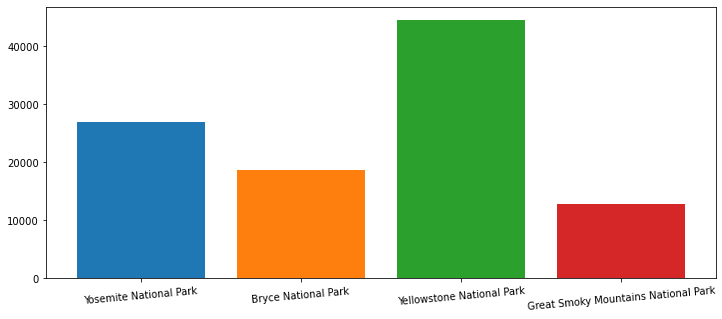

In [11]:
def sightings_per_park(parks): 
    plt.figure(figsize=(12, 5))

    for park in parks: 
        addsightings = df.observations[df.park_name == park].sum(axis=0)
        print(addsightings)
        print(park)
        plt.xticks(rotation=5)
        plt.bar(park, addsightings)
       
sightings_per_park(parks)
        

In [12]:
df.observations.sum()

102921

<AxesSubplot:xlabel='category', ylabel='observations'>

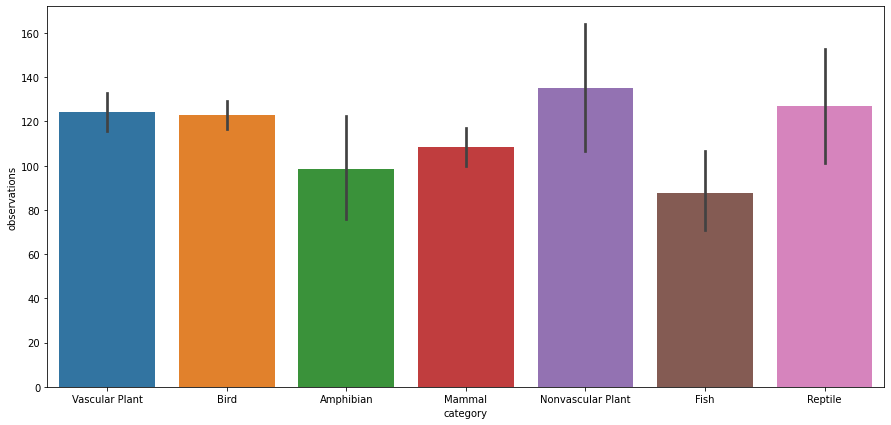

In [13]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df, x=df.category, y=df.observations)

<AxesSubplot:xlabel='park_name', ylabel='observations'>

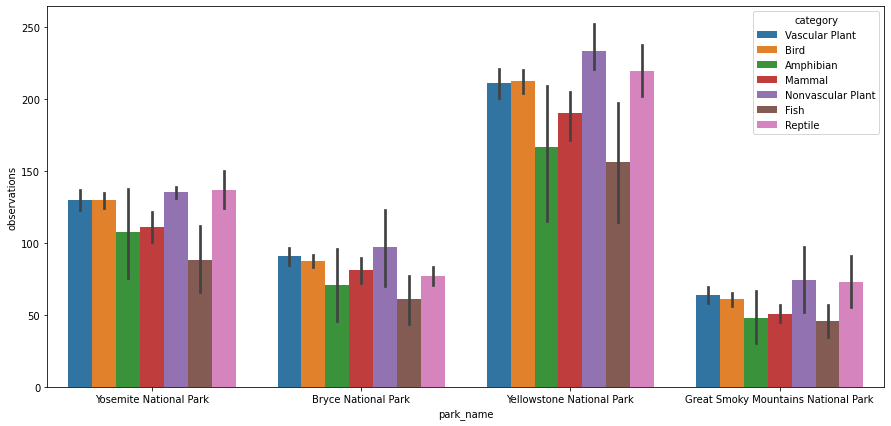

In [14]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df, x=df.park_name, y=df.observations, hue=df.category)

<AxesSubplot:xlabel='conservation_status', ylabel='observations'>

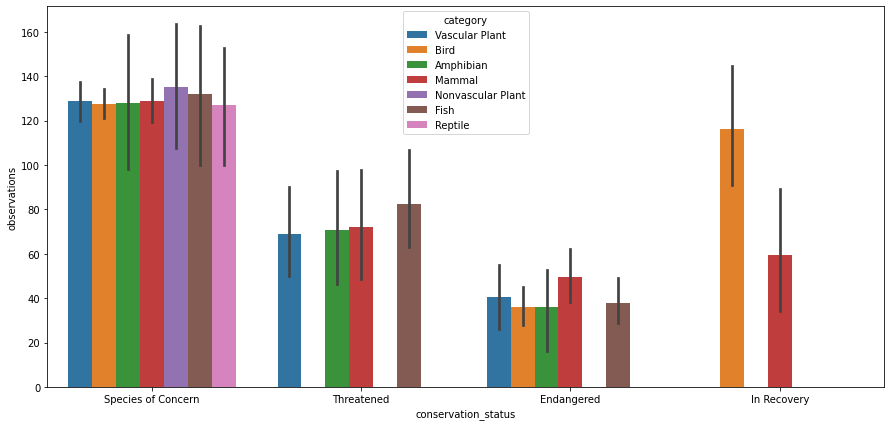

In [15]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df, x=df.conservation_status, y=df.observations, hue=df.category)

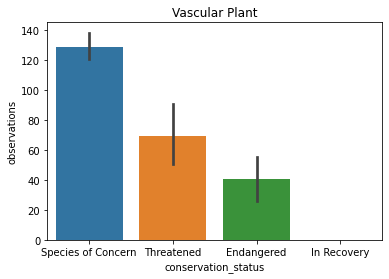

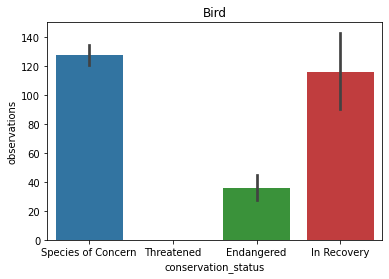

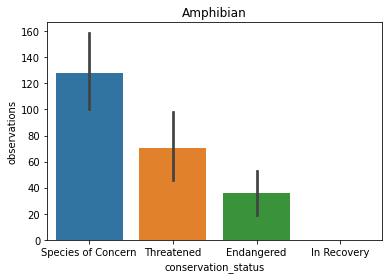

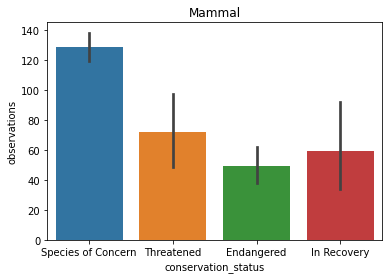

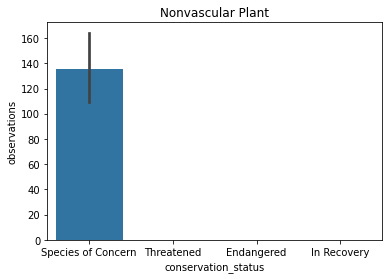

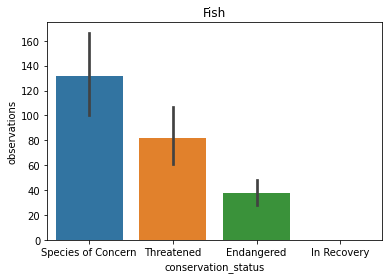

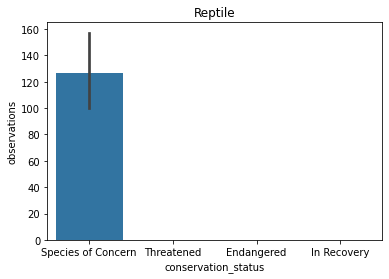

In [28]:
for animal in species: 
    plt.title(f'{animal}')
    sns.barplot(data=df, y=df.observations[animal == df.category], x=df.conservation_status)
    plt.show()